In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Sample_dataset.csv')

In [4]:
df.head()

,City,Date,Card_Type,Exp_Type,Gender,Amount,EMI_Paid
0,Delhi,29-Oct-14,Gold,Bills,F,82475,0
1,Mumbai,22-Aug-14,Platinum,Bills,F,32555,0
2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,0
3,Mumbai,12-Apr-14,Signature,Bills,F,123424,0
4,Bengaluru,05-May-15,Gold,Bills,F,171574,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
City         26052 non-null object
Date         26052 non-null object
Card_Type    26052 non-null object
Exp_Type     26052 non-null object
Gender       26052 non-null object
Amount       26052 non-null int64
EMI_Paid     26052 non-null int64
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
def tocode(city):
    if city in citycode:
        return citycode.index(city)
    else:
        return np.nan

In [7]:
import matplotlib.pyplot as plt
tmp=df.groupby("City").count()
citycode=pd.unique(df['City'])
citycode=list(citycode)
#df['City']=df['City'].apply(tocode)
#df["City"]

In [8]:
df1 = df.groupby('Gender').count()

In [9]:
df1

,City,Date,Card_Type,Exp_Type,Amount,EMI_Paid
Gender,,,,,,
F,13680,13680,13680,13680,13680,13680
M,12372,12372,12372,12372,12372,12372


In [10]:
import seaborn as sns
%matplotlib inline

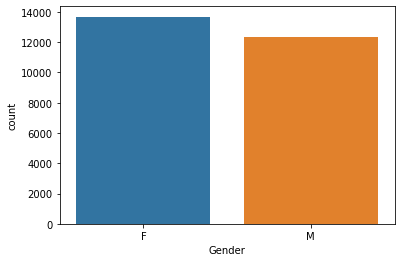

In [11]:
sns.countplot(x='Gender',data=df)

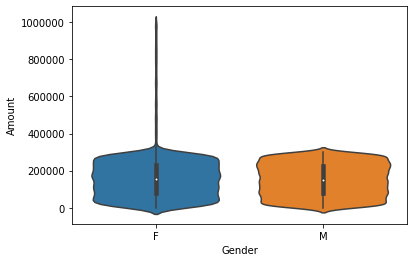

In [12]:
sns.violinplot(x="Gender", y="Amount", data=df)

In [13]:
df1=df.groupby('City')
df1

Top 5 cities based on count of “EMI paid” (who paid EMI by due date) in descending order based on count

In [14]:
df1=df[df['EMI_Paid']==1][['City','EMI_Paid']].groupby('City').count()

In [20]:
df1.sort_values(by=['EMI_Paid'],ascending=False).head()

,EMI_Paid
City,
Bengaluru,3135
Ahmedabad,3094
Delhi,3081
Mumbai,3054
Kalyan-Dombivali,16


Top 5 cities based on defaulters count (who didn’t pay EMI by due date) display result in descending order based on defaulters count.

In [21]:
df1.sort_values(by=['EMI_Paid'],ascending=True).head()

,EMI_Paid
City,
Zunheboto,1
Pondicherry,1
Varanasi,1
Sherghati,1
Mandi Dabwali,1


In [22]:
df2 = pd.get_dummies(df,columns=["City","Card_Type","Gender","Exp_Type"],drop_first=True)
df2.drop('Date',axis=1,inplace=True)
df2.head(5)

,Amount,EMI_Paid,City_Adilabad,City_Adityapur,City_Adoni,City_Adoor,City_Afzalpur,City_Agartala,City_Agra,City_Ahmedabad,...,City_Zunheboto,Card_Type_Platinum,Card_Type_Signature,Card_Type_Silver,Gender_M,Exp_Type_Entertainment,Exp_Type_Food,Exp_Type_Fuel,Exp_Type_Grocery,Exp_Type_Travel
0,82475,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,32555,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,101738,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,123424,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,171574,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(df2.drop('EMI_Paid',axis=1))

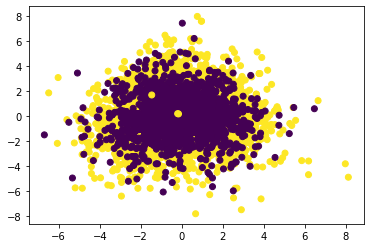

In [88]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(scaled_features)
x_pca.shape
y=df2['EMI_Paid']
plt.scatter(x_pca[:,0],x_pca[:,1],c =y)

Through it is understood that knn or naive bayes are best models for this kind of dataset.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df2['EMI_Paid'],
                                                    test_size=0.30)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

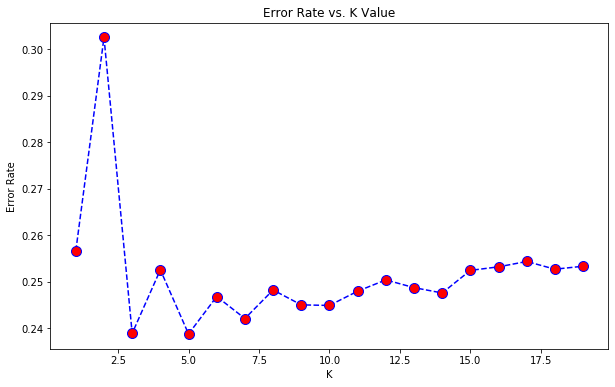

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
# NOW WITH K=30
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[1838  859]
 [ 111 5008]]


              precision    recall  f1-score   support

           0       0.94      0.68      0.79      2697
           1       0.85      0.98      0.91      5119

    accuracy                           0.88      7816
   macro avg       0.90      0.83      0.85      7816
weighted avg       0.88      0.88      0.87      7816

